# Nearest Neighbor for Back Injuries Classification

In this notebook, I will build a classifier to classify patients' back injuries based on measurements of the shape and orientation of their pelvis and spine. 

## 1. Load spine dataset

In [29]:
import numpy as np
import time
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load data set and code labels as 0 = 'NO', 1 = 'DH', 2 = 'SL'
labels = [b'NO', b'DH', b'SL'] # b: byte string
data = np.loadtxt('spine-data.txt', converters={6: lambda s: labels.index(s)})

## Split the train and test data set
train_data = data[:250, :6]
test_data = data[250:, :6]
train_labels = data[:250, -1] 
test_labels = data[250:, -1]

In [30]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (250, 6)
Number of training labels:  250
Testing dataset dimensions:  (60, 6)
Number of testing labels:  60


## 3. L1 and L2 Distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. Two natural distance function approaches are _Euclidean distance_ and _Manhattan distance_, and they are defined as follows: for two vectors $x, y \in \mathbb{R}^d$, 

their Euclidean distance (l2 distance) is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2},$$

Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$

And their Manhattan distance (l1 distance) is defined as
$$\|x - y\| = \sum_{i=1}^d |x_i - y_i|.$$

For the purposes of nearest neighbor computations, the Euclidean distance and the squared Euclidean distance are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance and the Manhattan distance. The following function does so.

In [31]:
## Computes squared Euclidean distance between two vectors.
def l2_dist(x,y):
    return np.sum(np.square(x-y))

def l1_dist(x,y):
    return np.sum(np.abs(x-y))

## Compute distance between the first and the second data in our training set.
print("L2 Distance from the first to the second: ", l2_dist(train_data[0,],train_data[1,]))

print("L1 Distance from the first to the second: ", l1_dist(train_data[0,],train_data[1,]))


L2 Distance from the first to the second:  194.6170999999999
L1 Distance from the first to the second:  28.83


## 4. Computing nearest neighbors

Now that we have a distance function defined, we can now turn to nearest neighbor classification. 

In [32]:
## Takes a vector x and returns the index of its nearest neighbor in train_data
def l2_find_NN(x):
    # Compute distances from x to every row in train_data
    l2_distances = [l2_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return np.argmin(l2_distances)

def l1_find_NN(x):
    # Compute distances from x to every row in train_data
    l1_distances = [l1_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return np.argmin(l1_distances)

## Takes a vector x and returns the class of its nearest neighbor in train_data
def l2_NN_classifier(x):
    # Get the index of the the nearest neighbor
    index = l2_find_NN(x)
    # Return its class
    return train_labels[index]

def l1_NN_classifier(x):
    # Get the index of the the nearest neighbor
    index = l1_find_NN(x)
    # Return its class
    return train_labels[index]

In [33]:
## A success case:
print("NN classification: ", l2_NN_classifier(test_data[0,]))
print("True label: ", test_labels[0])

NN classification:  2.0
True label:  2.0


## 5. Processing the full test set

Now let's apply our nearest neighbor classifier over the full data set. 

First we will compute the error rate we get on the test set for l2 and l1 distance.

In [34]:
## Predict on each test data point (and time it!)
l2_t_before = time.time()
l2_test_predictions = [l2_NN_classifier(test_data[i,]) for i in range(len(test_labels))]
l2_t_after = time.time()

l1_t_before = time.time()
l1_test_predictions = [l1_NN_classifier(test_data[i,]) for i in range(len(test_labels))]
l1_t_after = time.time()

## Compute the error
l2_err_positions = np.not_equal(l2_test_predictions, test_labels)
l2_error = float(np.sum(l2_err_positions))/len(test_labels)

l1_err_positions = np.not_equal(l1_test_predictions, test_labels)
l1_error = float(np.sum(l1_err_positions))/len(test_labels)

print("L2 Error of nearest neighbor classifier: ", l2_error)
print("Classification time (seconds) of L2: ", l2_t_after - l2_t_before)
print("")
print("L1 Error of nearest neighbor classifier: ", l1_error)
print("Classification time (seconds) of L1: ", l1_t_after - l1_t_before)

L2 Error of nearest neighbor classifier:  0.23333333333333334
Classification time (seconds) of L2:  0.049114227294921875

L1 Error of nearest neighbor classifier:  0.21666666666666667
Classification time (seconds) of L1:  0.03068399429321289


Then, we will compute the confusion matrix of the NN classifier, both in l2 and l1 distance.

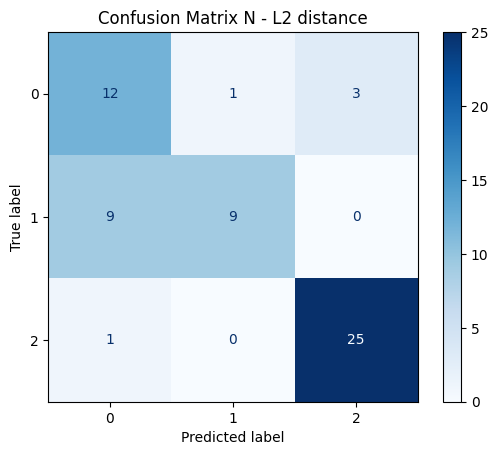

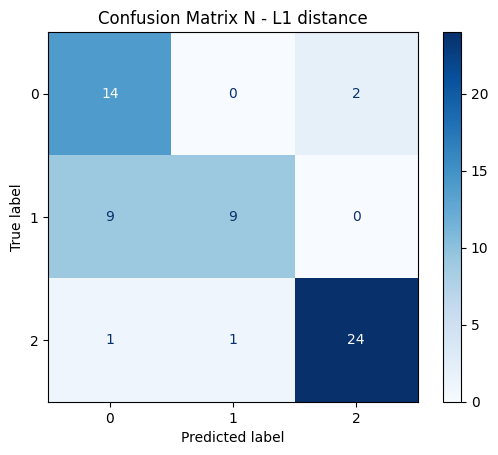

In [35]:
# Predict all the labels in test dataset
l2_y_prediction = [l2_NN_classifier(x) for x in test_data]
l1_y_prediction = [l1_NN_classifier(x) for x in test_data]

# Construct the confusion matrix
N_l2 = confusion_matrix(test_labels, l2_y_prediction)
N_l1 = confusion_matrix(test_labels, l1_y_prediction)

# Visualize the confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=N_l2, display_labels=range(3))
disp1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix N - L2 distance")

disp2 = ConfusionMatrixDisplay(confusion_matrix=N_l1, display_labels=range(3))
disp2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix N - L1 distance")

plt.show()